In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("StudentsPerformance.csv") # reading the csv file 

In [3]:
df.head(10)# displaying the top 10 observations

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [4]:
df.isna().sum()# checking for null value 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.dtypes# checking  the data types of the features in the dataset

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.shape # checking the number of features and observations in the dataset

(1000, 8)

In [7]:
df.rename(columns={"parental level of education":"parental_level_of_education"},inplace=True) # renaming the feature "parental level of education" to "parental_level_of_education"

In [8]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [9]:
column_name=df.columns  # renaming the "space" in the features by "under_score" with the help of a for loop 
for column in column_name:
   new_name=column.replace(" ","_")
   df.rename(columns={column:new_name},inplace=True)

In [10]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [11]:
df.describe() # method used for finding the statistical values in the dataset

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [12]:
df.head(20)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [13]:
df.describe(include=['object'])

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


# Questions & Answers

1.Find out how many males and females participated in the test

In [14]:
df["gender"].value_counts() # displays the total number of males and females participated in the test

female    518
male      482
Name: gender, dtype: int64

2.What do you think about the students' parental level of education?

In [15]:
df["parental_level_of_education"].value_counts() # displaying the counts of parental_level_of education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

<Figure size 3600x3600 with 0 Axes>

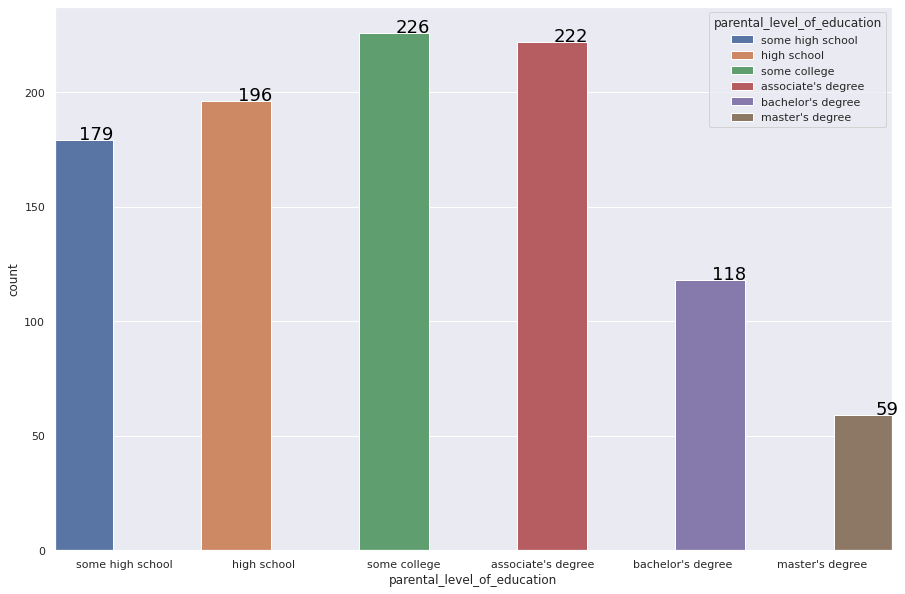

In [16]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(50,50))
fig, ax = plt.subplots(figsize=(15,10))# using  variable ax for single a axes 
sns.countplot(x='parental_level_of_education',hue='parental_level_of_education',data=df)
def change_width(ax, new_value) :   # function for changing the width of bars 
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        #  change the bar width
        patch.set_width(new_value)

        #  recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
     
for p in (ax.patches): #displaying the values in center on  bars
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+0.25),ha='center',va='baseline',color='black',size=18)       

change_width(ax, .50)  
plt.show()

Insights:-


1.Majority of the parents has some college education.

2.Average of parents are having some high school education,among that 22.2% are holding an associate degree and 22.6%  are having some college education.

3.only 5.9% parents are holding a master's degree

4.11.8% are holding bachelor's degree

3.Who scores the most on average for math, reading and writing based on

● Gender

● Test preparation course

<Figure size 3600x3600 with 0 Axes>

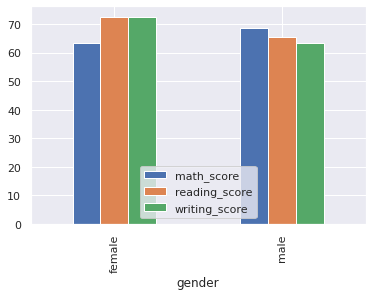

In [17]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(50,50))
df.groupby('gender')['math_score','reading_score','writing_score'].mean().plot.bar() # finding the average marks scored based on gender
plt.show()


Findings:-
* Males performed well than females for maths .
* For reading and writing females scored better than males 
* On average Females performed well than Males

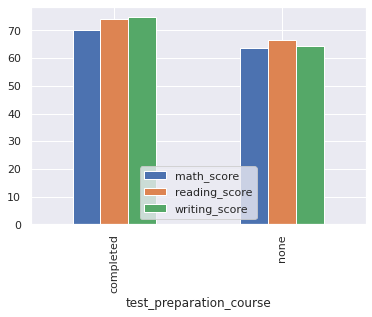

In [18]:
avg=df.groupby('test_preparation_course')['math_score','reading_score','writing_score'].mean().plot.bar()
avg

Findings:-
* Students who completed the test preparation course performed better than students not taken the course.

4.What do you think about the scoring variation for math, reading and writing
based on

● Gender

● Test preparation course

* Based on Gender 

In [19]:
mean_value=df.groupby('gender')['math_score','reading_score','writing_score'].mean()
mean_value

,math_score,reading_score,writing_score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [20]:
std_dev=df.groupby('gender')['math_score','reading_score','writing_score'].std()
std_dev


,math_score,reading_score,writing_score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [25]:
coeff_variation=std_dev/mean_value
coeff_variation

,math_score,reading_score,writing_score
gender,,,
female,0.252932,0.198524,0.204849
male,0.211509,0.215874,0.224241


Findings:-
* math_score

 * The standard deviation value indicates that for females the data has moved apart by 16.02 from the mean value 63.37and for males ,14.55 from the mean value 68.82. Males performed well than females.
* Reading_score

  * The sd value indicates that the data has moved apart by 14.41 and 14.14 from the means 72.59 and 65.54 for females and males respectively.

* Writing_score

 * Data points are  scattered  14.84 and 14.22  points away from the mean 72.46 and 63.44 for females and males respectively.

* In maths,males are more consistent than females .For reading and writing females are more consistent than males.



* Based on Test preparation course

In [26]:
mean_value=df.groupby('test_preparation_course')['math_score','reading_score','writing_score'].mean()
mean_value

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [27]:
std_dev=df.groupby('test_preparation_course')['math_score','reading_score','writing_score'].std()
std_dev

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [29]:
variation=std_dev/mean_value
variation

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,0.207554,0.182506,0.177231
none,0.246210,0.219956,0.233356


Findings:-
* Students who completed the test preparation course  scored better than those who have not taken the test.

5.The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this

In [39]:
df.sort_values(by='math_score',ascending=True)
top_maths=df.describe().at['25%', 'math_score']
print("Bonus should be given to the students who scored above",top_maths)
value=df[df['math_score']> 57.0].value_counts().sum()
print("Bonus points should be given to",value,"students")

Bonus should be given to the students who scored above 57.0
Bonus points should be given to 735 students
